Tensorflow various variants low level, api, functional, model, builtin 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


FUNCTIONAL API

It is a way to create models with more flexibility. The functional API can build non-linear models. 

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(784,))
inputs.shape

TensorShape([None, 784])

create a node of layers on the input object

In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

Layer call is drawing a connection between input layer to the layer created

In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Loading MINST data to built model using functional API.

Load MINST image data, reshape it into vectors, fit the model on the data and evaluate the model on the test data. 

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)
mode_fit = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 7s 8ms/step - loss: 0.3515 - accuracy: 0.9019 - val_loss: 0.1934 - val_accuracy: 0.9456
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1602 - accuracy: 0.9527 - val_loss: 0.1541 - val_accuracy: 0.9559


In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.1620 - accuracy: 0.9534 - 432ms/epoch - 1ms/step
Test loss: 0.1620122492313385
Test accuracy: 0.9534000158309937


model evaluate by ploting 'loss' metrics for functional API

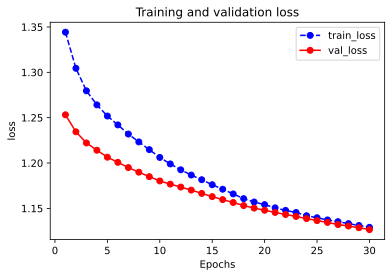

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history,'loss')

Kera Sequential model

model is a lineatr stack of layers and layers can be described very simply. It uses model.add() to define two dense layers in sequential model

sequential model with dense layers 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Load data

In [ ]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data.astype(float)
data['label'] = iris.target
data['label'] = data.label.replace(dict(enumerate(iris.target_names)))

label encoding

In [ ]:
label = pd.get_dummies(data['label'])
label.columns = ['label_' + str(x) for x in label.columns]
data = pd.concat([data, label], axis=1)

data.drop(['label'], axis=1, inplace=True)

In [ ]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = data[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

sequential model summary

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 5)                 25        
                                                                 
 dense_18 (Dense)            (None, 10)                60        
                                                                 
 dense_19 (Dense)            (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Epoch 1/30
2/2 [==============================] - 2s 430ms/step - loss: 1.3443 - accuracy: 0.1011 - val_loss: 1.2532 - val_accuracy: 0.1739
Epoch 2/30
2/2 [==============================] - 0s 87ms/step - loss: 1.3044 - accuracy: 0.1011 - val_loss: 1.2344 - val_accuracy: 0.1739
Epoch 3/30
2/2 [==============================] - 0s 93ms/step - loss: 1.2796 - accuracy: 0.0787 - val_loss: 1.2222 - val_accuracy: 0.1304
Epoch 4/30
2/2 [==============================] - 0s 131ms/step - loss: 1.2641 - accuracy: 0.0674 - val_loss: 1.2141 - val_accuracy: 0.0870
Epoch 5/30
2/2 [==============================] - 0s 90ms/step - loss: 1.2518 - accuracy: 0.0899 - val_loss: 1.2064 - val_accuracy: 0.0870
Epoch 6/30
2/2 [==============================] - 0s 102ms/step - loss: 1.2420 - accuracy: 0.0787 - val_loss: 1.2008 - val_accuracy: 0.0870
Epoch 7/30
2/2 [==============================] - 0s 88ms/step - loss: 1.2319 - accuracy: 0.0899 - val_loss: 1.1950 - val_accuracy: 0.0870
Epoch 8/30
2/2 [========

loss and accuracy of model

In [ ]:
model.evaluate(x = X_test,y = y_test)


2/2 [==============================] - 0s 6ms/step - loss: 1.1585 - accuracy: 0.2368


[1.1585173606872559, 0.2368421107530594]

model evaluation using metrics plot

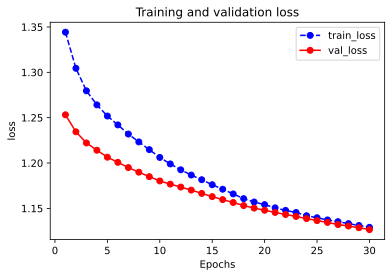

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history,'loss')

Low level API using iris data

This API gives more flexibility and it is way harder to utilize than a sequential model and functional API

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
my_custom_model = CustomModel(name='my_custom_model')

In [ ]:
my_custom_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = my_custom_model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 1s 170ms/step - loss: 1.4261 - accuracy: 0.3371 - val_loss: 1.3143 - val_accuracy: 0.3478
Epoch 2/30
2/2 [==============================] - 0s 25ms/step - loss: 1.3544 - accuracy: 0.3371 - val_loss: 1.2754 - val_accuracy: 0.3478
Epoch 3/30
2/2 [==============================] - 0s 25ms/step - loss: 1.3133 - accuracy: 0.3371 - val_loss: 1.2508 - val_accuracy: 0.3478
Epoch 4/30
2/2 [==============================] - 0s 29ms/step - loss: 1.2865 - accuracy: 0.3371 - val_loss: 1.2300 - val_accuracy: 0.3478
Epoch 5/30
2/2 [==============================] - 0s 25ms/step - loss: 1.2612 - accuracy: 0.3371 - val_loss: 1.2067 - val_accuracy: 0.3478
Epoch 6/30
2/2 [==============================] - 0s 26ms/step - loss: 1.2342 - accuracy: 0.3371 - val_loss: 1.1871 - val_accuracy: 0.3478
Epoch 7/30
2/2 [==============================] - 0s 27ms/step - loss: 1.2127 - accuracy: 0.3371 - val_loss: 1.1718 - val_accuracy: 0.3478
Epoch 8/30
2/2 [==========

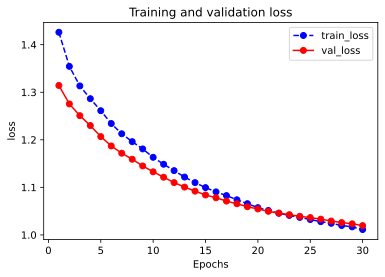

In [ ]:
plot_metric(history, 'loss') 